<a href="https://colab.research.google.com/github/manjotmb20/pythoncodes/blob/master/timeseries2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime

def parser(x):
  return datetime.strptime(x,'%Y-%m-%d')

df=pd.read_csv("clickStream.csv",index_col=2,parse_dates=[2],date_parser=parser)


In [73]:
df["category"].size

413913

In [0]:
df.tail()

,clicked_epoch,uuid,price,product_id,category
date,,,,,
2019-01-17,1.547680e+09,129381,1421.00,11266,running
2019-01-17,1.547682e+09,39989,769.65,163335,skirts
2019-01-17,1.547682e+09,39989,769.65,99632,casual trousers
2019-01-17,1.547682e+09,39989,629.65,151744,tops and tees
2019-01-17,1.547684e+09,46827,799.00,39418,casual shirts


In [0]:
df.size

2069565

In [0]:
df.Month[1]



AttributeError: ignored

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["category"]=le.fit_transform(df["category"])

In [0]:
ts=df["price"]

In [105]:
ts.size

413913

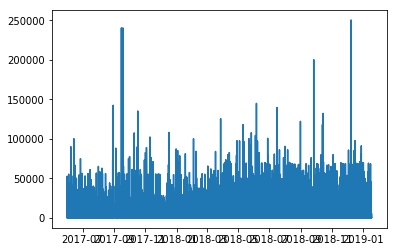

In [106]:
plt.plot(ts)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


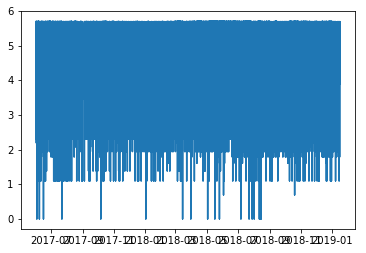

In [0]:
tk=np.log(ts)
plt.plot(tk)

In [0]:
df.size

2069565

In [0]:
df["category"].size

413913

In [0]:
df_diff=df["price"]

In [76]:
df_diff.size

413913

In [108]:
df_diff=df_diff[1:]
df_diff.head()

date
2017-06-01     599.5
2017-06-01    1349.1
2017-06-01    1124.1
2017-06-01     999.0
2017-06-01     999.0
Name: price, dtype: float64

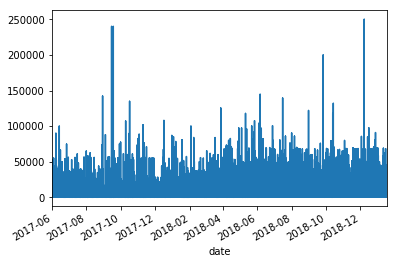

In [109]:
df_diff.plot()

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff)

In [0]:
df.head()


,clicked_epoch,uuid,price,product_id,category
date,,,,,
2017-06-01,1.496273e+09,110971,599.5,122712,149
2017-06-01,1.496273e+09,110971,599.5,3453,149
2017-06-01,1.496276e+09,49864,1349.1,13610,138
2017-06-01,1.496277e+09,49864,1124.1,48309,138
2017-06-01,1.496280e+09,21453,999.0,133239,149


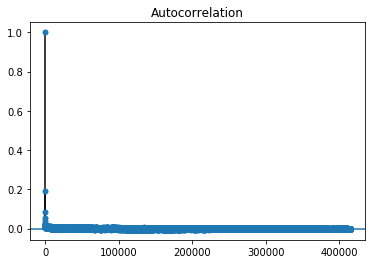

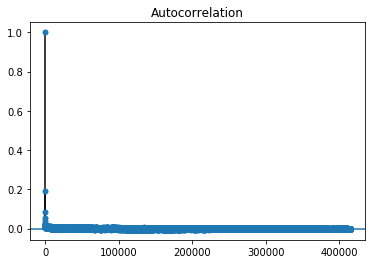

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff)

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [80]:
df_diff.size

413912

In [0]:
X=df_diff.values


In [82]:
X.size

413912

In [0]:
train=X[0:331130]
test=X[331130:]
predictions=[]

In [92]:
test.size


82782

In [0]:

model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [0]:
predictions=model_ar_fit.predict(start=331130,end=413911)

In [94]:
predictions

array([169.41454113, 170.91614466, 170.07036316, ..., 174.39137537,
       174.39137537, 174.39137537])

In [0]:
from sklearn.metrics import accuracy_score

In [0]:


acc=accuracy_score(test,predictions.round())

In [103]:
(acc)

0

In [0]:
predictions

array([169.41454113, 170.91614466, 170.07036316, ..., 174.39137537,
       174.39137537, 174.39137537])

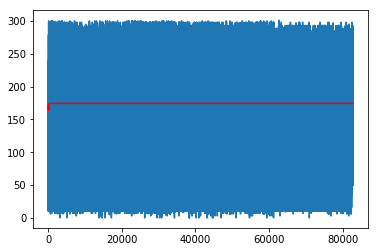

In [0]:
plt.plot(test)
plt.plot(predictions,color='red')

In [70]:
from statsmodels.tsa.arima_model import ARIMA

model_arima=ARIMA(train,order=(2,0,1))
model_arima_fit=model_arima.fit()

predictions=model_ar_fit.predict(start=331130,end=413913)

print(model_arima_fit.aic)

KeyboardInterrupt: ignored

In [0]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test,y_predictions)